In [102]:
topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/eboss_elg/chunk23_final/'


In [103]:
!ls /global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/eboss_elg/chunk23_final/randoms_seed_0_startid_1.fits

/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/eboss_elg/chunk23_final/randoms_seed_0_startid_1.fits


In [112]:
%pylab inline
import astropy.io.fits as fits



elg = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/dr8/seed_formation/eBOSS_ELG_full_ALLdata-vDR16.fits'
elg = fits.getdata(elg)
sel = (elg['z_ok']==1 )&((elg['chunk']=='eboss21')|(elg['chunk']=='eboss22'))&(elg['Z']>0)&(elg['Z']<2)&(elg['WEIGHT_CP']*elg['WEIGHT_NOZ']<20)
elg = elg[sel]



Populating the interactive namespace from numpy and matplotlib


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in less


In [113]:
sim_origin = fits.getdata(topdir+'randoms_seed_0_startid_1.fits')
g = sim_origin['g']
r = sim_origin['r']
z = sim_origin['z']
gr = g-r
rz = r-z
color_sgc = (g>21.825)&(g<22.825)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.218*gr+0.571<rz)&(rz<-0.555*gr+1.901)
sim_origin = sim_origin[color_sgc]

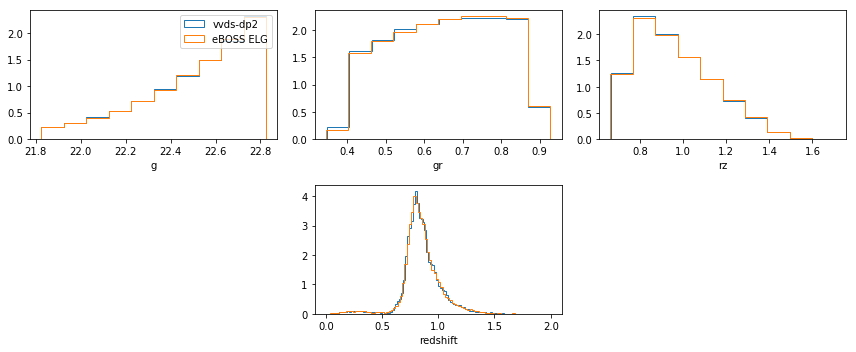

In [114]:
#fig 24
plt.figure(figsize = (12,5))
plt.subplot(2,3,1)
#g_ext = 22.5 - 2.5 * np.log10(sim['gflux'])
p11 = plt.hist(sim_origin['g'],normed = True,histtype='step',label = 'vvds-dp2')
p12 = plt.hist(elg['g'],label = 'eBOSS ELG',normed = True,histtype='step')
plt.legend()
#p13 = plt.hist(g_ext,label = 'eBOSS ELG',normed = True,histtype='step')
plt.xlabel('g')
plt.subplot(2,3,2)
#g_ext = 22.5 - 2.5 * np.log10(sim['gflux'])
#r_ext = 22.5 - 2.5 * np.log10(sim['rflux'])
p11 = plt.hist(sim_origin['g']-sim_origin['r'],label = 'DR3-DP2',normed = True,histtype='step')
p12 = plt.hist(elg['gr'],label = 'eBOSS ELG',normed = True,histtype='step')
#p13 = plt.hist(g_ext-r_ext,label = 'eBOSS ELG',normed = True,histtype='step')

plt.xlabel('gr')
plt.subplot(2,3,3)
#r_ext = 22.5 - 2.5 * np.log10(sim['rflux'])
#z_ext = 22.5 - 2.5 * np.log10(sim['zflux'])
p11 = plt.hist(sim_origin['r']-sim_origin['z'],label = 'DR3-DP2',normed = True,histtype='step')
p12 = plt.hist(elg['rz'],label = 'eBOSS ELG',normed = True,histtype='step')
#p13 = plt.hist(r_ext-z_ext,label = 'eBOSS ELG',normed = True,histtype='step')

plt.xlabel('rz')
'''
plt.subplot(2,3,4)
p11 = plt.hist(sim_origin['rhalf'],label = 'DR3-DP2',normed = True,histtype='step')
p12 = plt.hist(elg[final_tab['fracdev']<0.5]['SHAPEEXP_R'],label = 'eBOSS ELG',normed = True,histtype='step')
#plt.xlabel('rhalf')
'''
plt.subplot(2,3,5)
p11 = plt.hist(sim_origin['nn_redshift'],label = 'DR3-DP2',normed = True,histtype='step',bins=100)
p12 = plt.hist(elg['Z'],label = 'eBOSS ELG',normed = True,histtype='step',bins=100)
plt.xlabel('redshift')

'''
plt.subplot(2,3,6)

proxy = [plt.Rectangle((0,0),1,1,ec = '#1f77b4',fill=False), plt.Rectangle((0,0),1,1,ec = '#ff7f0e',fill=False),\
        plt.Rectangle((0,0),1,1,ec = '#2ca02c',fill=False)]
plt.legend(proxy, ["DR3-DP2","eBOSS ELG","DR3-DP2 w/ extinction"],loc='center')
plt.gca().axis('off')
'''
plt.tight_layout()

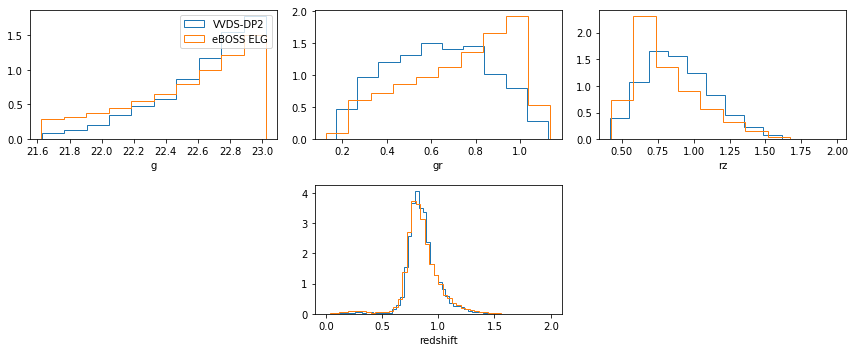

In [111]:
sim_origin = fits.getdata(topdir+'randoms_seed_1_startid_1.fits')

elg_like = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/sgc_elg_like.fits')

# the color color selection
g     = 22.5 - 2.5 * np.log10(elg_like['decam_flux'][:,1] / elg_like['decam_mw_transmission'][:,1])
r_mag = 22.5 - 2.5 * np.log10(elg_like['decam_flux'][:,2] / elg_like['decam_mw_transmission'][:,2])
z_mag = 22.5 - 2.5 * np.log10(elg_like['decam_flux'][:,4] / elg_like['decam_mw_transmission'][:,4])
gr = g - r_mag
rz = r_mag - z_mag



#fig 24
plt.figure(figsize = (12,5))
plt.subplot(2,3,1)
#g_ext = 22.5 - 2.5 * np.log10(sim['gflux'])
p11 = plt.hist(sim_origin['g'],label = 'VVDS-DP2',normed = True,histtype='step')
p12 = plt.hist(g,label = 'eBOSS ELG',normed = True,histtype='step')
plt.legend()
#p13 = plt.hist(g_ext,label = 'eBOSS ELG',normed = True,histtype='step')
plt.xlabel('g')
plt.subplot(2,3,2)
#g_ext = 22.5 - 2.5 * np.log10(sim['gflux'])
#r_ext = 22.5 - 2.5 * np.log10(sim['rflux'])
p11 = plt.hist(sim_origin['g']-sim_origin['r'],label = 'DR3-DP2',normed = True,histtype='step')
p12 = plt.hist(gr,label = 'eBOSS ELG',normed = True,histtype='step')
#p13 = plt.hist(g_ext-r_ext,label = 'eBOSS ELG',normed = True,histtype='step')

plt.xlabel('gr')
plt.subplot(2,3,3)
#r_ext = 22.5 - 2.5 * np.log10(sim['rflux'])
#z_ext = 22.5 - 2.5 * np.log10(sim['zflux'])
p11 = plt.hist(sim_origin['r']-sim_origin['z'],label = 'DR3-DP2',normed = True,histtype='step')
p12 = plt.hist(rz,label = 'eBOSS ELG',normed = True,histtype='step')
#p13 = plt.hist(r_ext-z_ext,label = 'eBOSS ELG',normed = True,histtype='step')

plt.xlabel('rz')
'''
plt.subplot(2,3,4)
p11 = plt.hist(sim_origin['rhalf'],label = 'DR3-DP2',normed = True,histtype='step')
p12 = plt.hist(elg[final_tab['fracdev']<0.5]['SHAPEEXP_R'],label = 'eBOSS ELG',normed = True,histtype='step')
#plt.xlabel('rhalf')
'''

plt.subplot(2,3,5)
p11 = plt.hist(sim_origin[color_sgc]['nn_redshift'],label = 'DR3-DP2',normed = True,histtype='step',bins=50)
p12 = plt.hist(elg['Z'],label = 'eBOSS ELG',normed = True,histtype='step',bins=50)
plt.xlabel('redshift')

'''
plt.subplot(2,3,6)

proxy = [plt.Rectangle((0,0),1,1,ec = '#1f77b4',fill=False), plt.Rectangle((0,0),1,1,ec = '#ff7f0e',fill=False),\
        plt.Rectangle((0,0),1,1,ec = '#2ca02c',fill=False)]
plt.legend(proxy, ["DR3-DP2","eBOSS ELG","DR3-DP2 w/ extinction"],loc='center')
plt.gca().axis('off')
'''
plt.tight_layout()

In [86]:
!ls /global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/etc

cluster_bricks			    eboss_nz_elg_covars_old.txt
cluster_randoms			    eboss_nz_elg_means.txt
cnn_bricks.txt			    eboss_nz_elg_means_copy.txt
db_table_elg			    eboss_nz_elg_means_old.txt
db_table_lrg			    eboss_nz_elg_weights.txt
db_table_star			    eboss_nz_elg_weights_copy.txt
desi_nz_elg_covars.txt		    eboss_nz_elg_weights_old.txt
desi_nz_elg_means.txt		    eboss_vvds_dev.csv
desi_nz_elg_weights.txt		    eboss_vvds_dev_trim.csv
eboss_elg_dr3deep2_DEV.csv	    eboss_vvds_exp.csv
eboss_elg_dr3deep2_DEV_trimmed.csv  eboss_vvds_exp_trim.csv
eboss_elg_dr3deep2_EXP.csv	    modulefiles
eboss_elg_dr3deep2_EXP_trimmed.csv  obiwan.module
eboss_elg_tsspectra_DEV.csv	    trim.py
eboss_elg_tsspectra_DEV_old.csv     vvds_dp2_dev.csv
eboss_elg_tsspectra_EXP.csv	    vvds_dp2_dev_trim.csv
eboss_elg_tsspectra_EXP_old.csv     vvds_dp2_exp.csv
eboss_nz_elg_covars.txt		    vvds_dp2_exp_trim.csv
eboss_nz_elg_covars_copy.txt


(array([ 0.61514717,  2.70182285,  1.94193517,  1.43534339,  1.12173895,
         0.61514717,  0.42215982,  0.27741931,  0.24123418,  0.09649367]),
 array([ 0.45803 ,  0.563644,  0.669258,  0.774872,  0.880486,  0.9861  ,
         1.091714,  1.197328,  1.302942,  1.408556,  1.51417 ]),
 <a list of 1 Patch objects>)

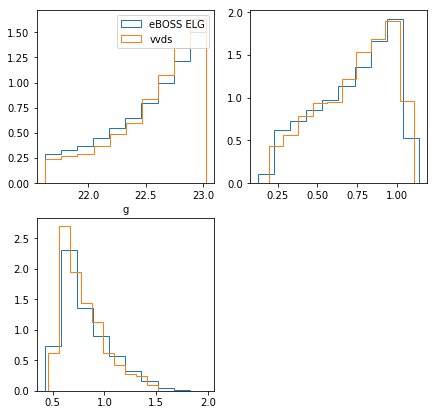

In [87]:
import pandas as pd
plt.figure(figsize = (7,7))
plt.subplot(2,2,1)
p12 = plt.hist(g,label = 'eBOSS ELG',normed = True,histtype='step')
vvds = pd.read_csv('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/etc/eboss_vvds_exp.csv')
plt.hist(vvds['g'],normed = True,histtype='step',label = 'vvds')
plt.xlabel('g')
plt.legend()

plt.subplot(2,2,2)
p12 = plt.hist(gr,label = 'eBOSS ELG',normed = True,histtype='step')
vvds = pd.read_csv('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/etc/eboss_vvds_exp.csv')
plt.hist(vvds['g']-vvds['r'],normed = True,histtype='step')

plt.subplot(2,2,3)
p12 = plt.hist(rz,label = 'eBOSS ELG',normed = True,histtype='step')
vvds = pd.read_csv('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/etc/eboss_vvds_exp.csv')
plt.hist(vvds['r'] - vvds['z'],normed = True,histtype='step')


Text(0.5,0,'rz')

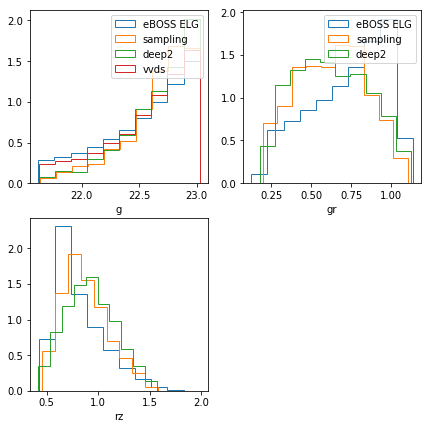

In [101]:
import pandas as pd
plt.figure(figsize = (7,7))
plt.subplot(2,2,1)
p12 = plt.hist(g,label = 'eBOSS ELG',normed = True,histtype='step')
p11 = plt.hist(sim_origin['g'],label = 'sampling',normed = True,histtype='step')
vvds = pd.read_csv('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/etc/eboss_elg_dr3deep2_EXP.csv')
plt.hist(vvds['g'],normed = True,histtype='step',label = 'deep2')
vvds = pd.read_csv('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/etc/eboss_vvds_exp.csv')
plt.hist(vvds['g'],normed = True,histtype='step',label = 'vvds')
plt.legend()
plt.xlabel('g')
plt.subplot(2,2,2)
p12 = plt.hist(gr,label = 'eBOSS ELG',normed = True,histtype='step')
p11 = plt.hist(sim_origin['g']-sim_origin['r'],label = 'sampling',normed = True,histtype='step')
vvds = pd.read_csv('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/etc/eboss_elg_dr3deep2_EXP.csv')
plt.hist(vvds['g']-vvds['r'],normed = True,histtype='step',label = 'deep2')
plt.legend()
plt.xlabel('gr')
plt.subplot(2,2,3)
p12 = plt.hist(rz,label = 'eBOSS ELG',normed = True,histtype='step')
p11 = plt.hist(sim_origin['r']-sim_origin['z'],label = 'sampling',normed = True,histtype='step')
vvds = pd.read_csv('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/etc/eboss_elg_dr3deep2_EXP.csv')
plt.hist(vvds['r'] - vvds['z'],normed = True,histtype='step')
plt.xlabel('rz')